<a href="https://colab.research.google.com/github/vishalsingha/English-Alphabet-Classification/blob/master/Mnist_DataAugmentation_Model_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "vishalsingh123"
os.environ['KAGGLE_KEY'] = "1a962bdaec58e6373ed5ea4daf627176"
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 86.6MB/s]
 55% 5.00M/9.16M [00:00<00:00, 5.26MB/s]
100% 9.16M/9.16M [00:01<00:00, 9.46MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 99.8MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import library
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [4]:
# load train data
df_train = pd.read_csv('/content/train.csv.zip')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = df_train['label']
Y_input = to_categorical(Y, num_classes = 10)
data_train = df_train.drop(['label'], axis = 1)
Y_input.shape

(42000, 10)

<BarContainer object of 10 artists>

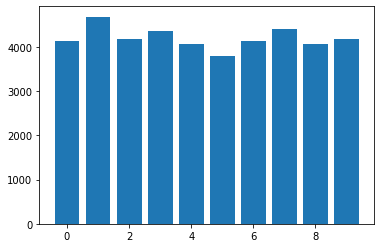

In [6]:
# plot labels
Y_count = Y.value_counts()
plt.bar(Y_count.index, Y_count)

In [7]:
# load test data
df_test = pd.read_csv('/content/test.csv.zip')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# scale the data
s = MinMaxScaler()
s.fit(data_train)
data_scaled = s.transform(data_train)
data_input = data_scaled.reshape(42000, 28, 28, 1)
test_data = s.transform(df_test)
test_set = test_data.reshape(-1, 28, 28, 1)

In [9]:
# create model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, input_shape = (28, 28, 1), kernel_size = (3,3), strides = (1, 1), padding ='same',  kernel_initializer='he_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3, 3), padding = 'same', strides =(1, 1), kernel_initializer='he_uniform' ))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.20))
    model.add(Conv2D(128, (3, 3), padding = 'same', strides =(1, 1),kernel_initializer='he_uniform' ))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(250, kernel_initializer='he_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Dense(100, kernel_initializer='he_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.20))
    model.add(Dense(10,kernel_initializer='he_uniform', activation = 'sigmoid'))
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adamax')
    return model


In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [ ]:
nets = 15
models = []
History = []
for i in range(nets):
    model = create_model()
    x_train, x_val, y_train, y_val = train_test_split(data_input, Y_input, test_size = 0.1)
    history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
        epochs = 132, steps_per_epoch = x_train.shape[0]//64,  
        validation_data = (x_val,y_val))
    models.append(model)
    model.save(f'/content/drive/My Drive/prgramming/c/m{i+10}.h5')
    History.append(history)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/132
590/590 [==============================] - 11s 18ms/step - loss: 0.5292 - accuracy: 0.8354 - val_loss: 0.0847 - val_accuracy: 0.9729
Epoch 2/132
590/590 [==============================] - 10s 17ms/step - loss: 0.1729 - accuracy: 0.9497 - val_loss: 0.0656 - val_accuracy: 0.9786
Epoch 3/132
590/590 [==============================] - 10s 17ms/step - loss: 0.1231 - accuracy: 0.9637 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 4/132
590/590 [==============================] - 10s 17ms/step - loss: 0.0972 - accuracy: 0.9713 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 5/132
590/590 [==============================] - 10s 17ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.0389 - val_accuracy: 0.9867
Epoch 6/132
590/590 [==============================] - 10s 17ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.0470 - val_accuracy: 0.9869
Epoch 7/132
590/590 [==============================] -

In [21]:
import glob
models = glob.glob('/content/drive/My Drive/prgramming/c/*')
result = 0
for i in models:
  m = tf.keras.models.load_model(i)
  m_pred = np.argmax(m.predict(test_set), axis = 1)
  m_pred_cat = to_categorical(m_pred, num_classes = 10)
  result = result + m_pred_cat
y_pred = np.argmax(result, axis = 1)

In [23]:
df_output = pd.DataFrame()
df_output['ImageId'] = list(range(1, 28001))
df_output['Label'] = y_pred
df_output.to_csv('output.csv', index = False)